In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris

In [2]:
ls

Baseline_model.ipynb       get_urls.ipynb
DataPreparation.py         get_urls.py
EDA.ipynb                  model.ipynb
README.md                  new_feature.csv
__pycache__/               scraping_users_info.ipynb
data/                      src/
data_cleaned.csv           users_data.csv
data_cleaning.ipynb        webpage/
data_no_nan.csv


In [3]:
data = pd.read_csv('data_cleaned.csv')

In [6]:
data.head()

,Unnamed: 0,user_name,full_name,num_posts,num_followers,num_followings,is_private,is_business,is_joined_recently,biography,num_followers_float,following_follower_ratio,engagement_rate,label
0,0,wqwqwq12345w,1998,0.0,1,12.0,0,0,1,åÁNi recentid@ ni dolid@ acÌÁ te la bancas_ÙÕ£...,1.0,6.000000,0.0,0
1,1,soymuyfalsa,soy muy falsa,5.0,62,1.0,0,0,0,0,62.0,0.015873,0.0,0
2,2,andrea_bordon_,andrea bordon,1.0,132,78.0,0,1,0,25/08/1999Monfalcone-Udine Italy_Ùà¨_Ùà_,132.0,0.586466,0.0,0
3,3,@ndah.endah.3701,@ndah.endah.3701 _ã¢ Instagram photos and videos,3.0,798,138.0,0,1,0,Haters make me famous_Ù÷È,798.0,0.172716,0.0,0
4,4,jolsuperstar_tz,jolsuperstartz,66.0,494,195.0,0,0,0,_ÙÓ¡FANSHII NDIO SPECIAL ACCOUNT YANGU KARIBUN...,494.0,0.393939,0.0,0


In [42]:
X = data.iloc[:, [3,5,6,7,8,10,11]]

In [30]:
y = data['label']

In [44]:
X.shape

(198, 7)

In [32]:
y.shape

(198,)

### train-test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 7), (50, 7), (148,), (50,))

### logistic regression

In [71]:
model = LogisticRegression()

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 84 to 122
Data columns (total 7 columns):
num_posts                   148 non-null float64
num_followings              148 non-null float64
is_private                  148 non-null int64
 is_business                148 non-null int64
 is_joined_recently         148 non-null int64
num_followers_float         148 non-null float64
following_follower_ratio    148 non-null float64
dtypes: float64(4), int64(3)
memory usage: 9.2 KB


In [73]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
y_pred = model.predict_proba(X_test)

In [75]:
log_loss1 = log_loss(y_test, y_pred)

In [76]:
log_loss1

0.6981216448661424

In [78]:
cv_logloss = -cross_val_score(model, X, y, scoring = 'neg_log_loss', cv = 10).mean()
cv_logloss

0.32261185172152895

### random forest

In [93]:
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

In [94]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [102]:
y_pred = rf.predict_proba(X_test)[:, 1]
y_pred

array([0.22, 0.27, 0.  , 0.43, 0.26, 0.  , 0.  , 0.65, 0.  , 0.  , 0.33,
       0.62, 0.  , 0.53, 0.13, 0.55, 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ,
       0.3 , 0.  , 0.12, 0.  , 0.12, 0.62, 0.01, 0.  , 0.  , 0.12, 0.01,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.02, 0.12, 0.27, 0.08])

In [104]:
cv_logloss_rf1 = -cross_val_score(rf, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [105]:
cv_logloss_rf1

0.17735862171376354

### Best random forest

In [106]:
random_forest_grid = {'max_depth': [3, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [20, 40, 80, 100],
                      'random_state': [359]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_log_loss')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  1.3min finished


best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 359}


In [107]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=359, verbose=0, warm_start=False)

In [108]:
y_pred_best = best_rf_model.predict_proba(X_test)[:, 1]


In [109]:
y_pred_best

array([2.29754658e-01, 1.93968278e-01, 8.38340291e-03, 3.88620649e-01,
       1.76440354e-01, 3.36408711e-04, 2.96942500e-03, 4.76212985e-01,
       1.14321685e-03, 3.93395463e-03, 2.19760040e-01, 5.84963903e-01,
       1.14321685e-03, 4.54465458e-01, 1.26176090e-01, 4.34407062e-01,
       3.36408711e-04, 1.05622985e-01, 2.96942500e-03, 7.53075378e-04,
       9.33457663e-03, 7.09219858e-05, 2.85011890e-01, 7.07238634e-03,
       2.73237032e-01, 2.96942500e-03, 1.26940478e-01, 4.76174573e-01,
       4.60663808e-02, 1.14321685e-03, 6.43593945e-03, 6.16790247e-02,
       1.51728138e-02, 6.53155106e-03, 2.96942500e-03, 2.80456585e-03,
       1.16720499e-02, 1.14321685e-03, 2.80456585e-03, 3.38148893e-03,
       8.38340291e-03, 2.38642313e-03, 1.14321685e-03, 2.73132976e-03,
       1.43339964e-02, 3.04266109e-03, 4.29834000e-02, 1.46706493e-01,
       1.65747722e-01, 1.32951143e-01])

In [110]:
cv_logloss_rf2 = -cross_val_score(best_rf_model, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [111]:
cv_logloss_rf2

0.18128442265286898

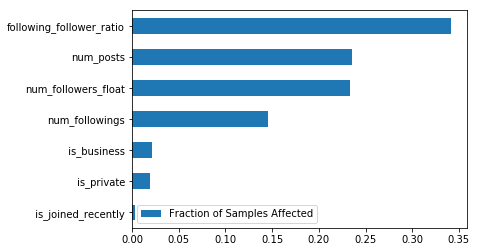

In [103]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

### predict proba given a username

In [136]:
from get_new_feature import get_new_features

In [142]:
from DataPreparation import get_info

In [387]:
url = 'https://www.instagram.com/lilylii818/'

In [388]:
get_info(url)

('lilylii818', 'Liying (Lily) Li ', '90', '128', '116')

In [389]:
get_new_features(url)

(True, False, False, 'Decision making.')

In [413]:
one_user = []

In [414]:
for item in get_info(url):
    one_user.append(item)
for feature in get_new_features(url):
    one_user.append(feature)

In [415]:
one_user_df = pd.DataFrame(np.array(one_user).reshape(1,-1))

In [416]:
one_user_df['num_followers_float'] = one_user_df.apply(lambda row: float(row[3].replace('k', 'e3').replace('m', 'e6')), axis=1)

In [417]:
one_user_df

,0,1,2,3,4,5,6,7,8,num_followers_float
0,lilylii818,Liying (Lily) Li,90,128,116,True,False,False,Decision making.,128.0


In [418]:
one_user_df['num_followers_float']

0    128.0
Name: num_followers_float, dtype: float64

In [419]:
one_user_df['following_follower_ratio'] = float(one_user_df[4]) / (float(one_user_df['num_followers_float']) +1)


In [420]:
one_user_df = one_user_df.drop(8, axis = 1)

In [421]:
one_user_df

,0,1,2,3,4,5,6,7,num_followers_float,following_follower_ratio
0,lilylii818,Liying (Lily) Li,90,128,116,True,False,False,128.0,0.899225


In [422]:
one_user_df.iloc[:,5]

0    True
Name: 5, dtype: object

In [425]:
#data_no_nan.iloc[:,6] = data_no_nan.iloc[:,6].astype(int)
one_user_df.iloc[0,5] = [1 if one_user_df.iloc[0,5] == 'True' else 0]
one_user_df.iloc[0,6] = [1 if one_user_df.iloc[0,6] == 'True' else 0]
one_user_df.iloc[0,7] = [1 if one_user_df.iloc[0,7] == 'True' else 0]

In [426]:
one_user_df.iloc[:,[2,4,5,6,7,8,9]]

,2,4,5,6,7,num_followers_float,following_follower_ratio
0,90,116,0,0,0,128.0,0.899225


In [340]:
one_user_pred_proba = best_rf_model.predict_proba(one_user_df.iloc[:,[2,4,5,6,7,8,9]])[:,1][0]

In [341]:
one_user_pred_proba

0.6815707387451095

In [427]:
from get_proba import *

In [437]:
get_proba('lotmorestore', model = best_rf_model)

0.5875455855357458